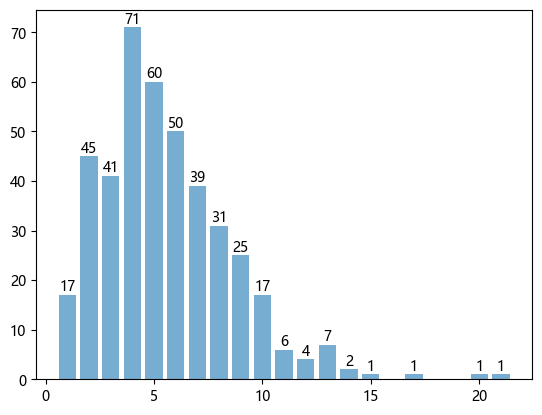

In [3]:
from matplotlib import pyplot as plt

path='C:/Users/slendeverb/Downloads/MAA-v4.24.0-win-x64/debug/gui.log'

with open(path,"r",encoding='utf-8') as f:
    data=f.readlines()
    added_money:dict[int,int]={}
    for line in data:
        if line.__contains__('已投资 ') and line.__contains__('(+'):
            start_pos=line.find('(')
            end_pos=line.find(')')
            money=int(line[start_pos+len('(+'):end_pos])
            if added_money.get(money) is None:
                added_money.setdefault(money,1)
            else:
                added_money[money]+=1

key_list:list[int]=[]
times_list:list[int]=[]
for key,times in added_money.items():
    key_list.append(key)
    times_list.append(times)

plt.figure()
bar_container=plt.bar(key_list,times_list,alpha=0.6)
plt.bar_label(bar_container,times_list)
plt.show()

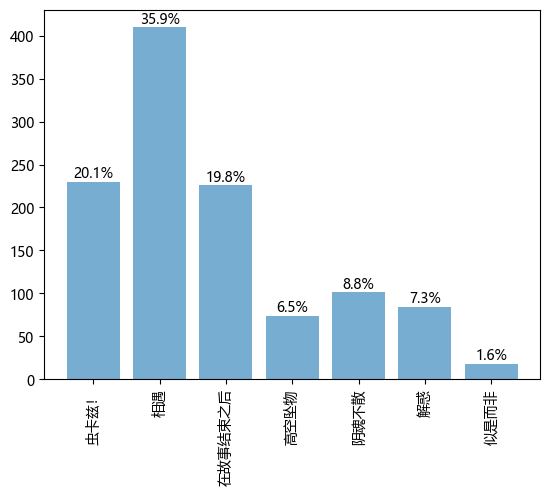

In [4]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

matplotlib.rc('font',family='Microsoft YaHei')

path='C:/Users/slendeverb/Downloads/MAA-v4.24.0-win-x64/debug/gui.log'

event_regex='事件: '

first_floor_event_list=['解惑','高空坠物','在故事结束之后','虫卡兹！','相遇','似是而非','阴魂不散']

with open(path,"r",encoding='utf-8') as f:
    data=f.readlines()
    event:dict[str,int]={}
    for line in data:
        if line.__contains__(event_regex):
            start_pos=line.find(event_regex)
            end_pos=-1
            event_name=line[start_pos+len(event_regex):end_pos]
            if event_name not in first_floor_event_list:
                continue
            if event.get(event_name) is None:
                event.setdefault(event_name,1)
            else:
                event[event_name]+=1

key_list:list[str]=[]
times_list:list[int]=[]
for key,times in event.items():
    key_list.append(key)
    times_list.append(times)

vectorized_func=np.vectorize(lambda x: f"{x*100:.1f}%")
probability=vectorized_func(np.array(times_list)/np.sum(times_list))

plt.figure()
bar_container=plt.bar(key_list,times_list,alpha=0.6)
plt.xticks(rotation=90)
plt.bar_label(bar_container,probability)
plt.show()